The goal of this notebook is to generate a label for whether an object was occluded or not in the each of the scenes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import imageio

In [2]:
## Preliminaries. 
equirect_direc = '/Users/angelaradulescu/Dropbox (Facebook)/VisualSearch/VisualSearchSpheres/'
object_location = pd.read_csv('data/location/location_all_objects.csv')
indexes = np.unique(object_location['scene'].values, return_index=True)[1]
all_scenes = [object_location['scene'].values[index] for index in sorted(indexes)]

In [5]:
## Prep scene and dummy variable.
scene = 'Living Room Location 5 Trial 10'
print(scene)
im = imageio.imread(equirect_direc + scene + '.png')
this_scene = object_location[object_location['scene'] == scene].reset_index(drop=True)
occluded = np.ones(len(this_scene)) * (-999)

print('There are ' + str(this_scene['object'].values.shape[0]) + ' objects in the scene.')

Living Room Location 5 Trial 10
There are 112 objects in the scene.


In [40]:
## Manually select object by index. This index will range from 0 to the total number of objects in the scene minus 1. 
obj_idx = 9
obj = this_scene['object'].values[obj_idx]
print(obj)

Oil Bottle 2


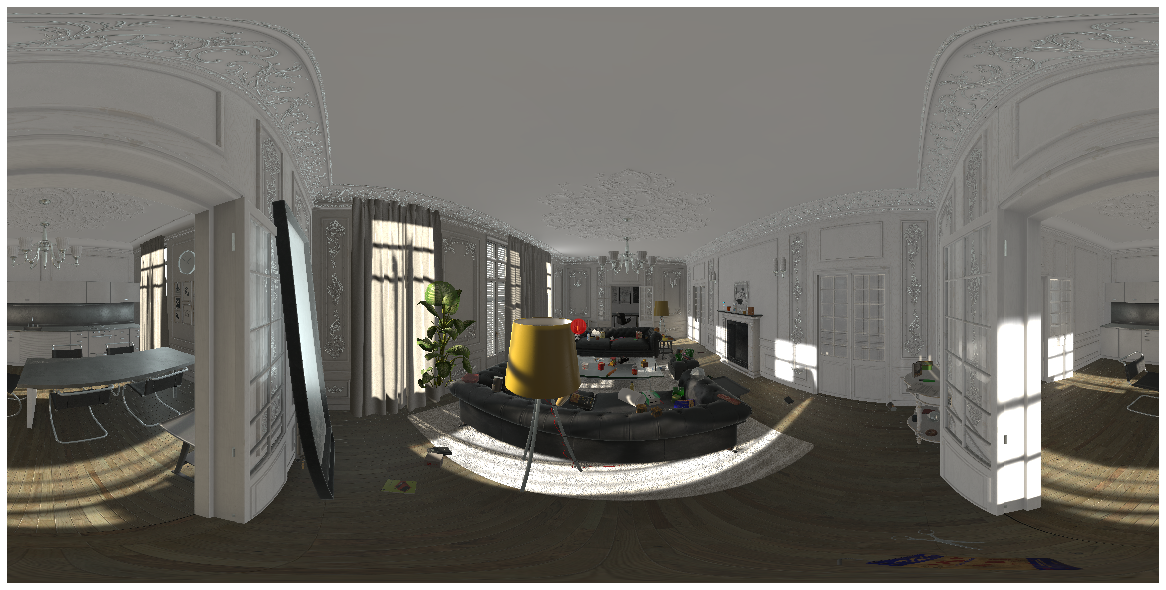

In [41]:
## Make plot to see where object is. To determine whether object is occluded, 
# inspect against high resultion version of the image.
fig = plt.figure()
fig.set_size_inches(16,8)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
ax.imshow(im)
ax.plot(this_scene['x_pos_pixel_360'].values[obj_idx],this_scene['y_pos_pixel_360'].values[obj_idx],
        'o',markersize=15,color='red', alpha=0.5);
ax.set_axis_off()

In [27]:
## Mark whether this object was occluded.
occluded[obj_idx] = 0

In [28]:
## Check work. 
occluded

array([   0., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999.])

In [35]:
## Save, only after all objects have been inspected. 
occluded = pd.DataFrame(occluded)
occluded.columns = ['occluded']
occluded.to_csv('data/occlusion/' + scene + '.csv')

In [32]:
occluded

,occluded
0,0.0
1,-999.0
2,-999.0
3,-999.0
4,-999.0
5,-999.0
6,-999.0
7,-999.0
8,-999.0
9,-999.0
